In [1]:
import os
path = os.getcwd() + "/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge/"
os.chdir(path)
os.getcwd()

'/home/peterm/Desktop/Projects/Python/sk/Zindi_Wazihub_Soil_Moisture_Prediction_Challenge'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display  
%matplotlib inline

from libs import utils

In [3]:
train_df = pd.read_csv("data/Train.csv", header=0)# ignore the first row of the CSV file.
cxt_maize_df = pd.read_csv("data/Context_Data_Maize.csv", header=0)
cxt_peanuts_df = pd.read_csv("data/Context_Data_Peanuts.csv", header=0)

In [4]:
print("train_df")
display(train_df.head())
print("cxt_maize_df")
display(cxt_maize_df.tail())
print("cxt_peanuts_df")
display(cxt_peanuts_df.tail())

train_df
cxt_maize_df
cxt_peanuts_df


,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
88,5-May,17.6,34.8,77.0,5.5,11.5,27.1,1.15,6.73,7.74,0.0,30.958,0.000,80.132
89,6-May,17.9,38.0,69.0,5.5,12.9,29.3,1.15,8.40,9.66,0.0,38.640,69.598,0.000
90,7-May,19.2,43.1,62.0,5.5,14.7,31.9,1.15,10.66,12.26,0.0,49.036,0.000,0.000
91,8-May,19.2,45.6,53.0,5.5,15.7,33.5,1.15,12.30,14.15,0.0,56.580,105.616,144.256
92,9-May,21.3,45.2,53.0,5.5,14.6,31.9,1.15,11.95,13.74,0.0,54.970,0.000,0.000


,Date,Min_Temp,Max_Temp,Humidity,Wind_Speed,Solar_Irradiance,Sun,Kc,ETc,ETo,Rainfall,Water_Need_1day,Water_Need_2days,Water_Need_3days
88,5-May,17.6,34.8,77.0,5.5,11.5,27.1,1.15,6.73,7.74,0.0,0.0,30.958,0.000
89,6-May,17.9,38.0,69.0,5.5,12.9,29.3,1.15,8.40,9.66,0.0,0.0,38.640,69.598
90,7-May,19.2,43.1,62.0,5.5,14.7,31.9,1.15,10.66,12.26,0.0,0.0,49.036,0.000
91,8-May,19.2,45.6,53.0,5.5,15.7,33.5,1.15,12.30,14.15,0.0,0.0,56.580,105.616
92,9-May,21.3,45.2,53.0,5.5,14.6,31.9,1.15,11.95,13.74,0.0,0.0,54.970,0.000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28049 entries, 0 to 28048
Data columns (total 15 columns):
timestamp               28049 non-null object
Soil humidity 1         8917 non-null float64
Irrigation field 1      10066 non-null float64
Soil humidity 2         26304 non-null float64
Irrigation field 2      28029 non-null float64
Soil humidity 3         16086 non-null float64
Irrigation field 3      17236 non-null float64
Soil humidity 4         26306 non-null float64
Irrigation field 4      28029 non-null float64
Air temperature (C)     23995 non-null float64
Air humidity (%)        23995 non-null float64
Pressure (KPa)          23995 non-null float64
Wind speed (Km/h)       23995 non-null float64
Wind gust (Km/h)        23995 non-null float64
Wind direction (Deg)    23995 non-null float64
dtypes: float64(14), object(1)
memory usage: 3.2+ MB


In [6]:
cxt_maize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
Date                93 non-null object
Min_Temp            71 non-null float64
Max_Temp            71 non-null float64
Humidity            71 non-null float64
Wind_Speed          71 non-null float64
Solar_Irradiance    71 non-null float64
Sun                 71 non-null float64
Kc                  83 non-null float64
ETc                 71 non-null float64
ETo                 70 non-null float64
Rainfall            83 non-null float64
Water_Need_1day     70 non-null float64
Water_Need_2days    70 non-null float64
Water_Need_3days    70 non-null float64
dtypes: float64(13), object(1)
memory usage: 10.2+ KB


In [43]:
cxt_peanuts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
Date                93 non-null object
Min_Temp            71 non-null float64
Max_Temp            71 non-null float64
Humidity            71 non-null float64
Wind_Speed          71 non-null float64
Solar_Irradiance    71 non-null float64
Sun                 71 non-null float64
Kc                  83 non-null float64
ETc                 76 non-null float64
ETo                 75 non-null float64
Rainfall            88 non-null float64
Water_Need_1day     88 non-null float64
Water_Need_2days    75 non-null float64
Water_Need_3days    75 non-null float64
date                93 non-null object
dtypes: float64(13), object(2)
memory usage: 11.0+ KB


In [7]:
# definitions
#!cat 'data/VariableDefinitions.csv'
pd.set_option('display.max_colwidth', 300) #default:50
display(pd.read_csv("data/VariableDefinitions.csv").dropna())

,Variabe Definitions,Unnamed: 1
2,timestamp,Time of recording in yyyy-mmm-dd hh-mm-ss
3,Soil_humidity_1,Soil humidity of field 1
4,Irrigation field 1,"1=irrigation on, 0=irrigation off"
5,Soil_humidity_2,Soil humidity of field 2
6,Irrigation field 2,"1=irrigation on, 0=irrigation off"
7,Soil_humidity_3,Soil humidity of field 3
8,Irrigation field 3,"1=irrigation on, 0=irrigation off"
9,Soil_humidity_4,Soil humidity of field 4
10,Irrigation field 4,"1=irrigation on, 0=irrigation off"
11,Air_temperature,Temprature of the air in degrees Celcius


In [11]:
display(pd.read_csv("data/SampleSubmission.csv").head())
display(pd.read_csv("data/SampleSubmission.csv").tail())

,ID,Values
0,2019-03-25 22:50:00 x Soil humidity 1,NaN
1,2019-03-25 22:55:00 x Soil humidity 1,NaN
2,2019-03-25 23:00:00 x Soil humidity 1,NaN
3,2019-03-25 23:05:00 x Soil humidity 1,NaN
4,2019-03-25 23:10:00 x Soil humidity 1,NaN


,ID,Values
5777,2019-05-31 07:25:00 x Soil humidity 4,NaN
5778,2019-05-31 07:30:00 x Soil humidity 4,NaN
5779,2019-05-31 07:35:00 x Soil humidity 4,NaN
5780,2019-05-31 07:40:00 x Soil humidity 4,NaN
5781,2019-05-31 07:45:00 x Soil humidity 4,NaN


In [4]:
train_df_saved = train_df.copy()
cxt_maize_df_saved = cxt_maize_df.copy()
cxt_peanuts_df_saved = cxt_peanuts_df.copy()

In [143]:
# train_df = train_df_saved.copy()
# cxt_maize_df = cxt_maize_df_saved.copy()
# cxt_peanuts_df = cxt_peanuts_df_saved.copy()

In [144]:
train_df['datetime'] = pd.to_datetime(train_df['timestamp']) #to datetime
train_df['time_of_day'] = train_df['datetime'].apply(lambda x: x.hour) #some properties
train_df['month'] = train_df['datetime'].apply(lambda x: x.month)
train_df['week_of_year'] = train_df['datetime'].apply(lambda x: x.weekofyear)
train_df['date'] = train_df['datetime'].apply(lambda x: x.date()) #to datetime.date
train_df = train_df.set_index('datetime')
cxt_maize_df['date'] = pd.to_datetime(cxt_maize_df['Date'],format="%d-%b")
cxt_maize_df['date'] = cxt_maize_df['date'].apply(lambda x: (x + pd.offsets.DateOffset(year=2019)).date()) #to datetime.date
cxt_peanuts_df['date'] = pd.to_datetime(cxt_peanuts_df['Date'],format="%d-%b")
cxt_peanuts_df['date'] = cxt_peanuts_df['date'].apply(lambda x: (x + pd.offsets.DateOffset(year=2019)).date()) #to datetime.date

In [19]:
# display(train_df['date'].head())
# display(train_df['time_of_day'].head())
# display(cxt_maize_df['date'].head(20))
# display(cxt_peanuts_df['date'].head(20))

datetime
2019-02-23 00:00:00    2019-02-23
2019-02-23 00:05:00    2019-02-23
2019-02-23 00:10:00    2019-02-23
2019-02-23 00:15:00    2019-02-23
2019-02-23 00:20:00    2019-02-23
Name: date, dtype: object

In [145]:
humidity_field1 = train_df[['Soil humidity 1']]
humidity_field2 = train_df[['Soil humidity 2']]
humidity_field3 = train_df[['Soil humidity 3']]
humidity_field4 = train_df[['Soil humidity 4']]

In [131]:
print(humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].shape, humidity_field1.shape,
humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].shape[0]/humidity_field1.shape[0])
print(humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].shape, humidity_field2.shape,
humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].shape[0]/humidity_field2.shape[0])
print(humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].shape, humidity_field3.shape,
humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].shape[0]/humidity_field3.shape[0])
print(humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].shape, humidity_field4.shape,
humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].shape[0]/humidity_field4.shape[0])

(19132, 1) (28049, 1) 0.6820920531926272
(1745, 1) (28049, 1) 0.06221255659738315
(11963, 1) (28049, 1) 0.42650361866733216
(1743, 1) (28049, 1) 0.06214125280758672


## Field 2 and 4..

In [132]:
humidity_field2.loc[pd.isna(humidity_field2['Soil humidity 2'])].index

DatetimeIndex(['2019-05-25 07:45:00', '2019-05-25 07:50:00',
               '2019-05-25 07:55:00', '2019-05-25 08:00:00',
               '2019-05-25 08:05:00', '2019-05-25 08:10:00',
               '2019-05-25 08:15:00', '2019-05-25 08:20:00',
               '2019-05-25 08:25:00', '2019-05-25 08:30:00',
               ...
               '2019-05-31 08:35:00', '2019-05-31 08:40:00',
               '2019-05-31 08:45:00', '2019-05-31 08:50:00',
               '2019-05-31 08:55:00', '2019-05-31 09:00:00',
               '2019-05-31 09:05:00', '2019-05-31 09:10:00',
               '2019-05-31 09:15:00', '2019-05-31 09:20:00'],
              dtype='datetime64[ns]', name='datetime', length=1745, freq=None)

In [148]:
hum2 = humidity_field2.loc[
            '2019-05-25 07:45:00':'2019-05-31 09:20:00'
            ].loc[
                ~pd.isna(humidity_field2['Soil humidity 2'])
]
hum2

,Soil humidity 2
datetime,
2019-05-27 14:50:00,26.0
2019-05-29 12:00:00,30.0
2019-05-30 17:05:00,26.0


In [133]:
humidity_field4.loc[pd.isna(humidity_field4['Soil humidity 4'])].index

DatetimeIndex(['2019-05-25 07:45:00', '2019-05-25 07:50:00',
               '2019-05-25 07:55:00', '2019-05-25 08:00:00',
               '2019-05-25 08:05:00', '2019-05-25 08:10:00',
               '2019-05-25 08:15:00', '2019-05-25 08:20:00',
               '2019-05-25 08:25:00', '2019-05-25 08:30:00',
               ...
               '2019-05-31 08:35:00', '2019-05-31 08:40:00',
               '2019-05-31 08:45:00', '2019-05-31 08:50:00',
               '2019-05-31 08:55:00', '2019-05-31 09:00:00',
               '2019-05-31 09:05:00', '2019-05-31 09:10:00',
               '2019-05-31 09:15:00', '2019-05-31 09:20:00'],
              dtype='datetime64[ns]', name='datetime', length=1743, freq=None)

In [149]:
hum4 = humidity_field4.loc[
            '2019-05-25 07:45:00':'2019-05-31 09:20:00'
            ].loc[
                ~pd.isna(humidity_field4['Soil humidity 4'])
];
hum4

,Soil humidity 4
datetime,
2019-05-25 13:10:00,33.0
2019-05-27 17:55:00,23.0
2019-05-28 10:25:00,23.0
2019-05-29 16:10:00,17.0
2019-05-30 11:55:00,16.0


Seems like for the datetime range that data is missing for 2 and 4, there are a few (approximately <0.3%) recorded values. 
    1. Set them to Nan for now

In [150]:
humidity_field2.loc[
    '2019-05-25 07:45:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field2['Soil humidity 2']),'Soil humidity 2'] = np.nan
humidity_field4.loc[
    '2019-05-25 07:45:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field4['Soil humidity 4']),'Soil humidity 4'] = np.nan

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [6]:
# train_df['Soil humidity 2'] = train_df['Soil humidity 2'].fillna(method='ffill')
# humidity_field2 = train_df[['Soil humidity 2']]
# train_df['Soil humidity 4'] = train_df['Soil humidity 4'].fillna(method='ffill')
# humidity_field4 = train_df[['Soil humidity 4']]

## Field 1 and 3...

In [63]:
humidity_field1.loc[pd.isna(humidity_field1['Soil humidity 1'])].index

DatetimeIndex(['2019-03-25 22:50:00', '2019-03-25 22:55:00',
               '2019-03-25 23:00:00', '2019-03-25 23:05:00',
               '2019-03-25 23:10:00', '2019-03-25 23:15:00',
               '2019-03-25 23:20:00', '2019-03-25 23:25:00',
               '2019-03-25 23:30:00', '2019-03-25 23:35:00',
               ...
               '2019-05-31 08:35:00', '2019-05-31 08:40:00',
               '2019-05-31 08:45:00', '2019-05-31 08:50:00',
               '2019-05-31 08:55:00', '2019-05-31 09:00:00',
               '2019-05-31 09:05:00', '2019-05-31 09:10:00',
               '2019-05-31 09:15:00', '2019-05-31 09:20:00'],
              dtype='datetime64[ns]', name='datetime', length=19132, freq=None)

In [155]:
hum1 = humidity_field1.loc[
        '2019-03-25 22:50:00':'2019-05-31 09:20:00'
        ].loc[
            ~pd.isna(humidity_field1['Soil humidity 1'])
]
hum1

,Soil humidity 1
datetime,
2019-03-26 07:35:00,41.0
2019-03-27 13:40:00,42.0
2019-03-29 19:50:00,46.0


In [64]:
humidity_field3.loc[pd.isna(humidity_field3['Soil humidity 3'])].index

DatetimeIndex(['2019-04-19 20:15:00', '2019-04-19 20:20:00',
               '2019-04-19 20:25:00', '2019-04-19 20:30:00',
               '2019-04-19 20:35:00', '2019-04-19 20:40:00',
               '2019-04-19 20:45:00', '2019-04-19 20:50:00',
               '2019-04-19 20:55:00', '2019-04-19 21:00:00',
               ...
               '2019-05-31 08:35:00', '2019-05-31 08:40:00',
               '2019-05-31 08:45:00', '2019-05-31 08:50:00',
               '2019-05-31 08:55:00', '2019-05-31 09:00:00',
               '2019-05-31 09:05:00', '2019-05-31 09:10:00',
               '2019-05-31 09:15:00', '2019-05-31 09:20:00'],
              dtype='datetime64[ns]', name='datetime', length=11963, freq=None)

In [156]:
hum3 = humidity_field3.loc[
        '2019-04-19 20:15:00':'2019-05-31 09:20:00'
        ].loc[
            ~pd.isna(humidity_field3['Soil humidity 3'])
]
hum3

,Soil humidity 3
datetime,
2019-04-20 10:50:00,14.00
2019-04-23 14:05:00,-38.00
2019-04-23 20:15:00,-0.33


Humidity data missing from most of the period between **2019-03-25 22:50:00 and 2019-05-31 09:20:00** for **field 1** and between **2019-04-19 20:15:00 to 2019-05-31 09:20:00** for **field 3**
    1. As with field 2 and 4, set the outliers to nan

In [157]:
humidity_field1.loc[
    '2019-03-25 22:50:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field1['Soil humidity 1']),'Soil humidity 1'] = np.nan
humidity_field3.loc[
    '2019-04-19 20:15:00':'2019-05-31 09:20:00'
    ].loc[
        ~pd.isna(humidity_field3['Soil humidity 3']),'Soil humidity 3'] = np.nan

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

## Visualization..

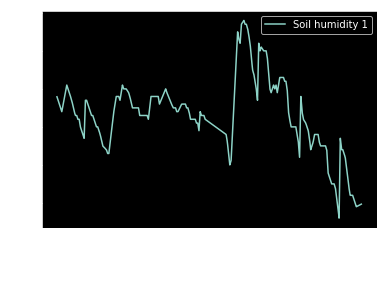

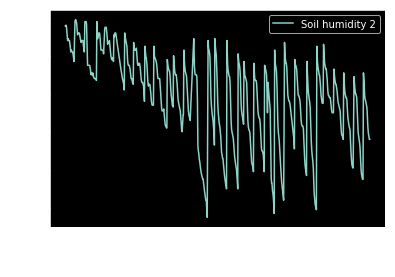

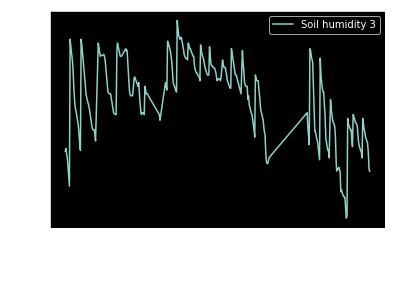

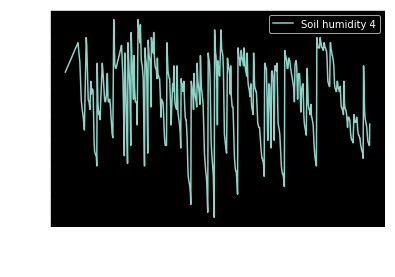

In [163]:
display(humidity_field1.plot())
plt.ylabel('humidity_field1');
display(humidity_field2.plot())
plt.ylabel('humidity_field2');
display(humidity_field3.plot())
plt.ylabel('humidity_field3');
display(humidity_field4.plot())
plt.ylabel('humidity_field4');

## Drift: Using just time..

In [7]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# perform train/test split
cutoff_field2 = '2019-05-20'
target_field2 = 'Soil humidity 2'
df_train, df_test, y_train, y_test = utils.ts_train_test_split(train_df, cutoff_field2, target_field2)

Text(0.5, 0, 'Lag (5minute steps)')

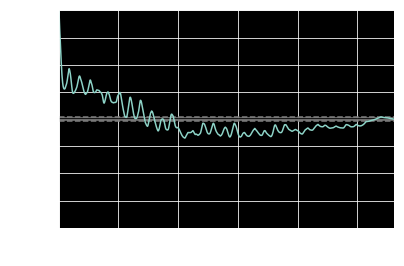

In [32]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train_df[target_field2])
plt.xlabel('Lag (5minute steps)')
#plt.xlim([0, 1000]);

In [8]:
from tempfile import mkdtemp
from shutil import rmtree

In [9]:
#rmtree(cachedir)
cachedir = mkdtemp() #creates a temporary directory

In [17]:
# construct and train pipeline
time = utils.IndexSelector()
poly = PolynomialFeatures()
scaler = StandardScaler()
svr = SVR(gamma='auto')
pipe = Pipeline([('indices', time),
                 ('drift', poly),
                 ('scaler', scaler),
                 ('regressor', svr)],memory=cachedir)
param_grid = {"drift__degree": range(2,4),
                "regressor__degree":range(2,4),
                "regressor__kernel":('rbf','poly','sigmoid'),
                #"regressor__C": np.linspace(1,50,10), #>0
                #"regressor__tol":np.logspace(-4,1,10),
                #"regressor__epsilon":np.linspace(0.1,1.1,5)
                }
ts_cv = TimeSeriesSplit(5) # 5-fold forward chaining
search = GridSearchCV(
    pipe, param_grid, cv=ts_cv, scoring = 'r2', verbose=1)
print("Performing grid search...")
search.fit(df_train, y_train)
print("Best score: %0.3f" % search.best_score_)
print("Best parameters set:")
best_parameters = search.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#pipe.fit(df_train, y_train)

# make predictions
# y_pred = pipe.predict(train_df)
# print("Test set R^2: {:g}".format(pipe.score(df_test, y_test)))
# print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(pipe.predict(df_test), y_test))))

Performing grid search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 0.70s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably

In [62]:
df_train.shape, df_test.shape

((24768, 19), (3281, 19))

In [21]:
residuals = train_df[target_field2] - y_pred

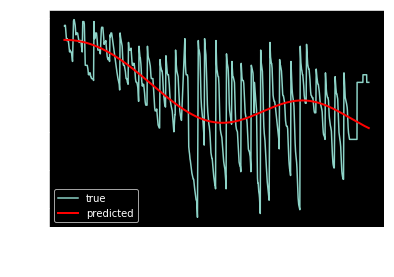

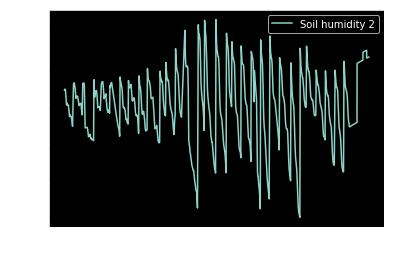

In [22]:
utils.plot_results(train_df, target_field2, y_pred, residuals=residuals)

## Drift: Add Weather components..

In [10]:
from sklearn.pipeline import FeatureUnion

rmtree(cachedir)
cachedir = mkdtemp() #creates a temporary directory

time = utils.IndexSelector()
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()
svr = SVR(gamma='auto', degree=2)
cols = ['Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']
weather = utils.WeatherComponents(cols)
union = FeatureUnion([('indices', time), ('weather', weather)])
pipe = Pipeline([('union', union),
                ('drift', poly),
                ('scaler', scaler),
                ('regressor', svr)],memory=cachedir)
pipe.fit(df_train, y_train)

# make predictions
y_pred = pipe.predict(train_df)
print("Test set R^2: {:g}".format(pipe.score(df_test, y_test)))
print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(pipe.predict(df_test), y_test))))

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
Test set R^2: -0.0401256
Test set RMSE: 17.2527


In [ ]:
# pipe1 = Pipeline([('union', union)])
# df_train = pipe1.transform(df_train)
# pipe2 = Pipeline([('drift', poly),
#                 ('scaler', scaler),
#                 ('regressor', svr)],memory=cachedir)
# param_grid = {"drift__degree": range(2,4),
#                 #"regressor__degree":range(2,4),
#                 #"regressor__kernel":('rbf','poly','sigmoid'),
#                 "regressor__C": np.linspace(1,50,10), #>0
#                 #"regressor__tol":np.logspace(-4,1,10),
#                 #"regressor__epsilon":np.linspace(0.1,1.1,5)
#                 }
# ts_cv = TimeSeriesSplit(5) # 5-fold forward chaining
# search = GridSearchCV(
#     pipe2, param_grid, cv=ts_cv, scoring = 'r2', verbose=1)
# print("Performing grid search...")
# search.fit(df_train, y_train)
# print("Best score: %0.3f" % search.best_score_)
# print("Best parameters set:")
# best_parameters = search.best_estimator_.get_params()
# for param_name in sorted(param_grid.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [11]:
residuals = train_df[target_field2] - y_pred

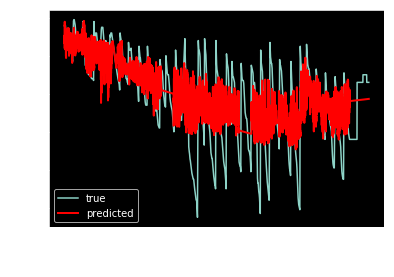

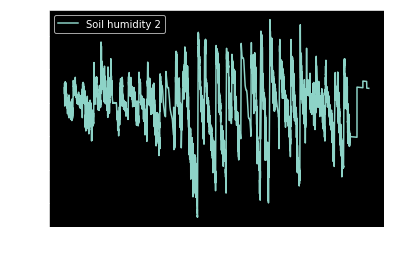

In [13]:
utils.plot_results(train_df, target_field2, y_pred, residuals=residuals)

## AR/ARMA

In [15]:
from statsmodels.tsa.ar_model import AR

lag=200
ar = AR(y_train, dates=df_train.index)
ar = ar.fit(maxlag=lag)
ar_train_pred = ar.predict(start=lag, end=len(df_train)-1)
print("Train set RMSE: {:g}".format(np.sqrt(mean_squared_error(ar_train_pred, y_train[lag:]))))

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
Train set RMSE: 0.053124


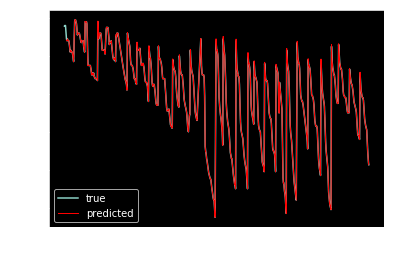

In [16]:
# plot training set results
ax = plt.subplot();
to_plot = df_train[target_field2]
to_plot.plot(ax=ax);
pd.DataFrame(ar_train_pred,index=df_train.index[lag:]).plot(ax=ax, color='red', marker=None, linestyle='solid',linewidth=1,markersize=None);
# plt.xlabel('year')
plt.ylabel(target_field2)
plt.legend(['true', 'predicted']);
plt.show();

In [36]:
# plot 20 step forecast of test set
# steps = y_test.shape[0]
# ar_test_pred = ar.predict(start=len(df_train), end=len(df_train) + steps - 1)

In [35]:
# # plot test set results
# plt.plot(range(1, steps+1), y_test.iloc[:steps])
# plt.plot(range(1, steps+1), ar_test_pred)
# plt.xlabel('step')
# plt.ylabel('actual')
# plt.legend(['true', 'predicted'])

## Seasonality..

In [14]:
from scipy import fftpack

In [15]:
resd = residuals-residuals.mean()
Y = fftpack.fft(resd/np.std(residuals)) #(residuals.max() - residuals.min())
Y

array([ 4.17443857e-13   +0.j        ,  1.09461790e+03 +227.4095167j ,
       -1.69064010e+03-3430.4767145j , ...,
        1.15572847e+03  -13.98801322j, -1.69064010e+03+3430.4767145j ,
        1.09461790e+03 -227.4095167j ])

In [46]:
t_span = humidity_field2.index[-1] - humidity_field2.index[0]
#t_span = ((t_span.days * 3600 * 24) + t_span.seconds) //(60*5)
t_span = t_span.days/30 #every month
t_span

3.2333333333333334

In [47]:
f = np.linspace(0, len(Y), len(Y))/t_span
f[:50]

array([ 0.        ,  0.30928938,  0.61857875,  0.92786813,  1.23715751,
        1.54644689,  1.85573626,  2.16502564,  2.47431502,  2.7836044 ,
        3.09289377,  3.40218315,  3.71147253,  4.0207619 ,  4.33005128,
        4.63934066,  4.94863004,  5.25791941,  5.56720879,  5.87649817,
        6.18578755,  6.49507692,  6.8043663 ,  7.11365568,  7.42294505,
        7.73223443,  8.04152381,  8.35081319,  8.66010256,  8.96939194,
        9.27868132,  9.5879707 ,  9.89726007, 10.20654945, 10.51583883,
       10.8251282 , 11.13441758, 11.44370696, 11.75299634, 12.06228571,
       12.37157509, 12.68086447, 12.99015385, 13.29944322, 13.6087326 ,
       13.91802198, 14.22731135, 14.53660073, 14.84589011, 15.15517949])

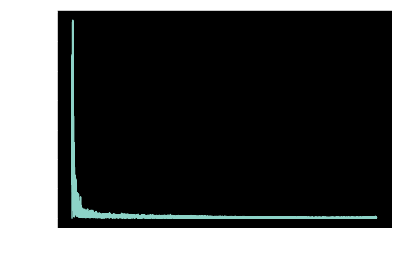

In [49]:
plt.plot(f[:len(Y)//2], np.abs(Y[:len(Y)//2])/len(Y));
plt.xlabel('frequency (1/month)')
plt.ylabel('amplitude');

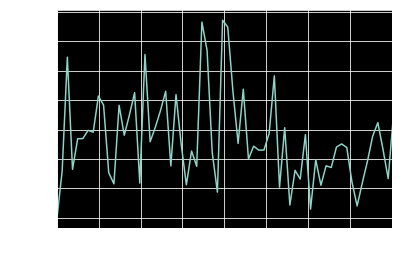

In [71]:
#plt.style.use('ggplot')
plt.plot(f[:len(Y)//2], np.abs(Y[:len(Y)//2])/len(Y));
plt.grid(True)
plt.xlim([-0.01,20])
plt.xlabel('frequency (1/month)')
plt.ylabel('amplitude');

dominant freqs at approximately : 0.6, 5,25, 8.65, 9.9, 13 times a week

In [72]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class FourierComponents(BaseEstimator, TransformerMixin):
#     def __init__(self, freqs):
#         """Create features based on sin(2*pi*f*t) and cos(2*pi*f*t)."""
#         self.freqs = freqs
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X = X.astype(np.float64)
#         Xt = np.zeros((X.shape[0], 2*len(self.freqs)))
        
#         for i, f in enumerate(self.freqs):

#             Xt[:, 2*i]= np.cos(2*np.pi*f*X).reshape(-1) #even cols
#             Xt[:, 2*i + 1] = np.sin(2*np.pi*f*X).reshape(-1) #odd cols
    
#         return Xt

In [96]:
from sklearn.pipeline import FeatureUnion

# construct and train pipeline
rmtree(cachedir)
cachedir = mkdtemp() #creates a temporary directory

time = utils.IndexSelector()
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()
svr = SVR(gamma='auto', degree=2)
cols = ['Air temperature (C)',
       'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)']
weather = utils.WeatherComponents(cols)
fourier = utils.FourierComponents([0.6, 5,25, 8.65, 9.9, 13])
union = FeatureUnion([('drift', poly), ('fourier', fourier)])
baseline = Pipeline([('indices', time),
                    ('union', union),
                    ('scaler', scaler),
                    ('regressor', svr)
                    ],memory=cachedir)
# train using the time values only
# validate against the known humidity values
baseline.fit(df_train, y_train)
#test = baseline.fit_transform(df_train)

# make predictions
y_pred = baseline.predict(train_df)
print("Test set R^2: {:g}".format(baseline.score(df_test, y_test)))
print("Test set RMSE: {:g}".format(np.sqrt(mean_squared_error(pipe.predict(df_test), y_test))))

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/pipeline.py:230: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
Test set R^2: -0.400147
Test set RMSE: 17.2527


In [97]:
residuals = train_df[target_field2] - y_pred

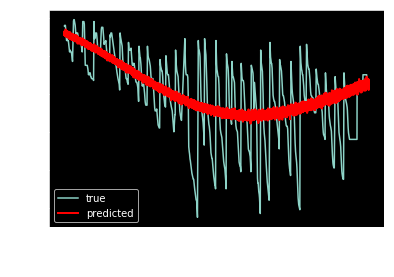

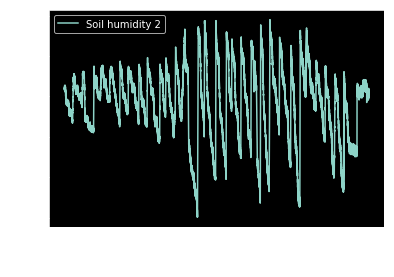

In [98]:
utils.plot_results(train_df, target_field2, y_pred, residuals=residuals)

## Modeling noise

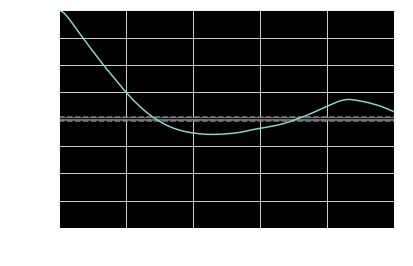

In [102]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(residuals)
plt.xlabel('Lag (5minute steps)')
plt.xlim([0, 1000]);

Seems like after 100 steps in the past the correlation drops

In [103]:
# class ResidualFeatures(BaseEstimator, TransformerMixin):
#     def __init__(self, window=100):
#         """Generate features based on window statistics of past noise/residuals."""
#         self.window = window
        
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         df = pd.DataFrame()
#         df['residual'] = pd.Series(X, index=X.index)
#         df['prior'] = df['residual'].shift(1) #series with all prev residual value for each row
#         df['mean'] = df['residual'].rolling(window=self.window).mean() #mean of previous 100 residuals
#         df['diff'] = df['residual'].diff().rolling(window=self.window).mean() #differential of previous 100 residuals
#         df = df.fillna(method='bfill') #first row endsup with Nans due to shift.
        
#         return df

In [122]:
residuals.shape

(28049,)

In [116]:
from sklearn.metrics import r2_score
rmtree(cachedir)
cachedir = mkdtemp() #creates a temporary directory

# create and train residual model
# residuals = train_df[target_field2] - baseline.predict(train_df) # train residuals from fourier
scaler = StandardScaler()
svr = SVR(gamma='auto', degree=2)
residual_feats = utils.ResidualFeatures(window=100)
residual_model = Pipeline([('residual_features', residual_feats),
                            ('scaler', scaler),
                            ('regressor', svr)
                            ], memory=cachedir)
# train using all residuals save for last 20
# validating using values 20 steps in the future for each row, 
# removing 20 NaNs at the end to match shape
residual_model.fit(residuals.iloc[:-20], residuals.shift(-20).dropna()) 

# evaluate model
resd_pred = residual_model.predict(residuals) # prediction for all time steps residuals
resd_pred = pd.Series(resd_pred, index=train_df.index)
resd_pred = resd_pred.shift(20).dropna() # shift predicted values to matching time step

resd_pred_ = residuals.loc[residuals.index > '2019-05-20'] # grab true residual values after '2019-05-20'
resd_pred_test = resd_pred.loc[resd_pred.index > '2019-05-20'] # evaluate only on predicted residual values after '2019-05-20'
print("Residual test set R^2: {:g}".format((r2_score(resd_pred_, resd_pred_test))))
print("Residual test set RMSE: {:g}".format(np.sqrt(mean_squared_error(resd_pred_, resd_pred_test))))

Residual test set R^2: 0.939838
Residual test set RMSE: 3.90874
